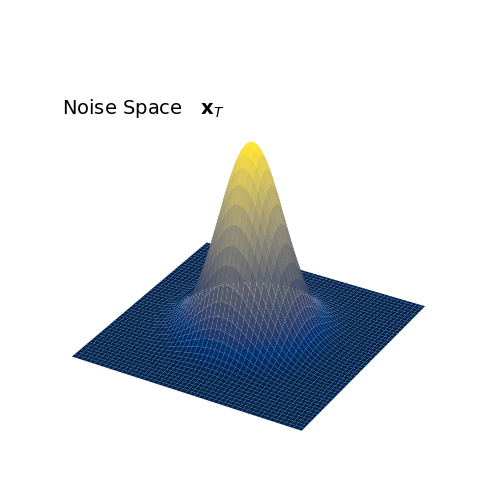

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

# Grid
x = np.linspace(-4, 4, 200)
y = np.linspace(-4, 4, 200)
X, Y = np.meshgrid(x, y)
Z = (1/(2*np.pi)) * np.exp(-0.5 * (X**2 + Y**2))

mpl.rcParams['font.serif'] = ['Times New Roman']
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='cividis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('density')
ax.set_axis_off()
plt.tight_layout()
plt.savefig("noise_prior.png", dpi=300, bbox_inches='tight', transparent=True)

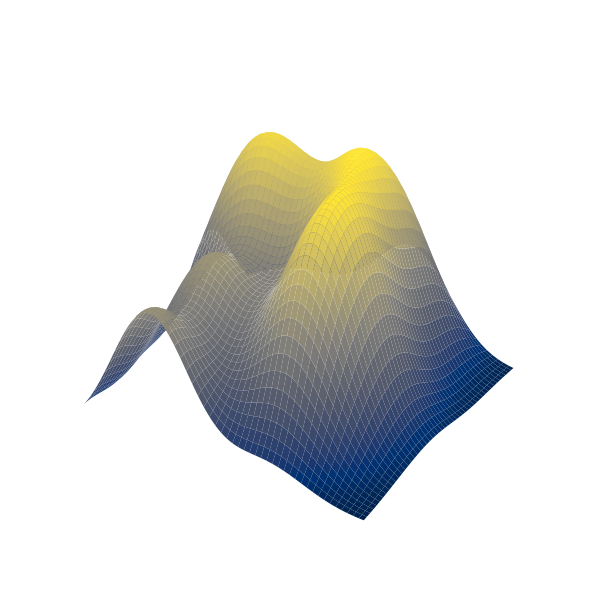

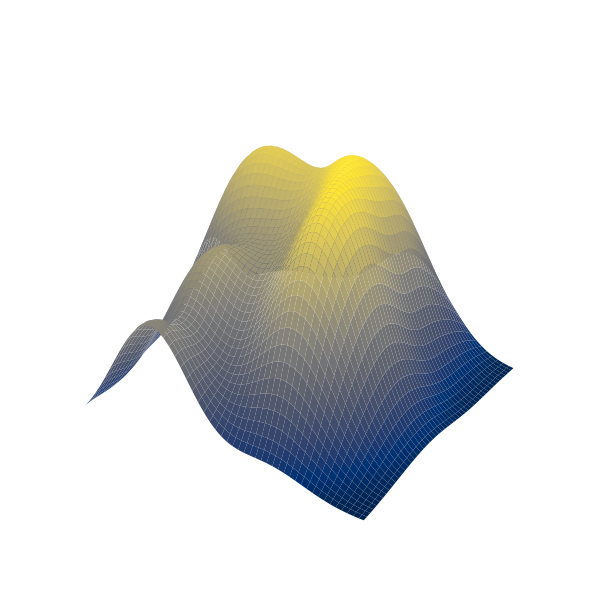

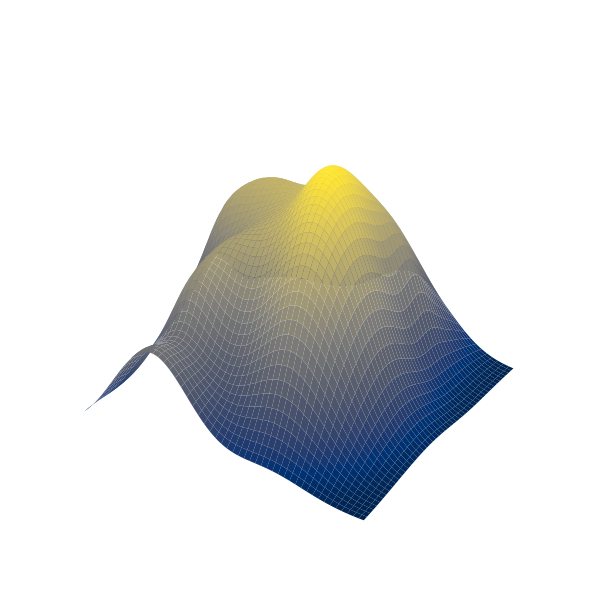

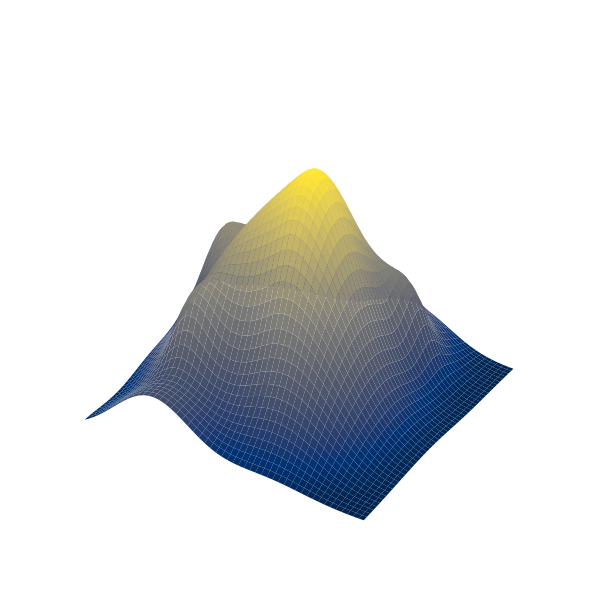

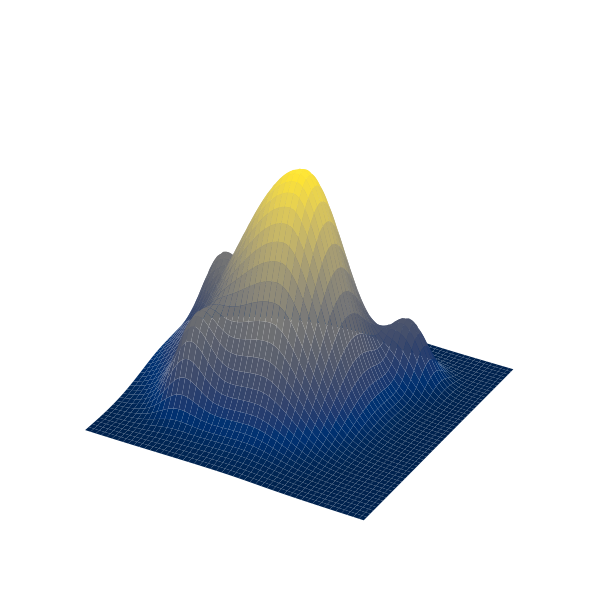

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Grid
x = np.linspace(-4, 4, 300)
y = np.linspace(-4, 4, 300)
X, Y = np.meshgrid(x, y)

# Asymmetric central mode
a, b, c = 1.0, 0.3, 0.6   # controls asymmetry
central = np.exp(-0.5 * ((a * (X**2) * (X >= 0)) + (b * (X**2) * (X < 0)) + c * Y**2))

# Add smaller lumps
Z1 = central.copy()
np.random.seed(0)
centers = [(-2,-2), (2,2), (-3,1)]
for cx, cy in centers:
    lump = 0.25 * np.exp(-0.5*((X-cx)**2 + (Y-cy)**2) / 0.5**2)
    Z1 += lump

Z2 = 0
centers = [(-2,-4), (1,3), (-3,2), (1.5,-0.4), (0.8, 1.2), (-1.4, 2), (-2,-1.1), (1.2, -2)]
for cx, cy in centers:
    lump = np.exp(-0.1*((X-cx)**2 + (Y-cy)**2) / 0.5**2)
    Z2 += lump


# Plot
for lamb in np.linspace(1, 0, 5):
    Z = (1-lamb) * Z1 + lamb * Z2

    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='cividis', edgecolor='none')

    ax.set_axis_off()
    plt.tight_layout()
    plt.savefig(f"posterior_{lamb}.png", dpi=300, bbox_inches='tight', transparent=True)

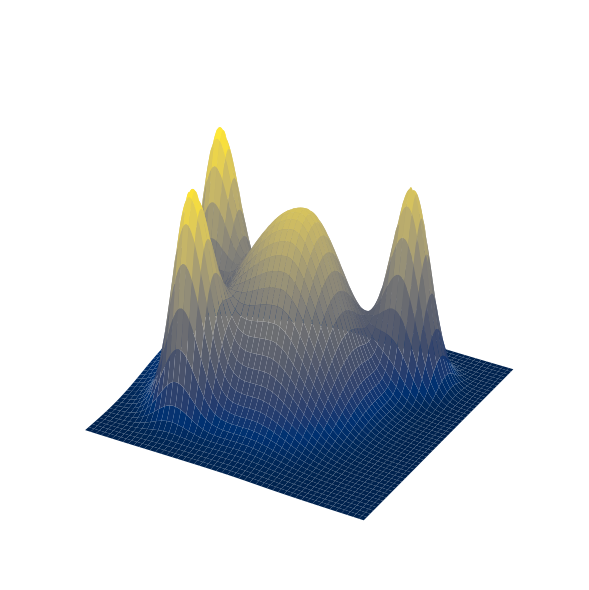

In [19]:
# Grid
x = np.linspace(-4, 4, 300)
y = np.linspace(-4, 4, 300)
X, Y = np.meshgrid(x, y)

# Asymmetric central mode
a, b, c = 1.0, 0.3, 0.6   # controls asymmetry
central = np.exp(-0.5 * ((a * (X**2) * (X >= 0)) + (b * (X**2) * (X < 0)) + c * Y**2))

# Add smaller lumps
Z = central.copy()
np.random.seed(0)
centers = [(-2,-2), (2,2), (-3,1)]
for cx, cy in centers:
    lump = np.exp(-0.5*((X-cx)**2 + (Y-cy)**2) / 0.5**2)
    Z += lump

# Plot
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='cividis', edgecolor='none')

ax.set_axis_off()
plt.tight_layout()
plt.show()